--------------------------------------------------------------------------------
#Importar Bibliotecas

In [347]:
#importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler

----------------------------------------------------------
#Importa o Dataset Original

In [348]:
#Importar os dados Originais -----------------------------------------------------------------------------<<<<

In [349]:
orig = pd.read_csv('/content/2019_orig_submission_final.csv')

In [350]:
orig.head()

,time,temp
0,2019-01-01T00:00:00Z,20.0
1,2019-01-01T01:00:00Z,19.4
2,2019-01-01T02:00:00Z,20.0
3,2019-01-01T03:00:00Z,18.9
4,2019-01-01T04:00:00Z,18.9


#Cria o dataset com dados faltantes

In [351]:
#Cria o dataset com dados faltantes -----------------------------------------------------------------------------<<<<

In [352]:
### Cria um dataset com dados faltantes

#falt= orig.drop_duplicates()
#falt=orig.drop_duplicates(subset='temp') #remove valores duplicados

falt = orig.loc[(orig['temp'] != 10) ] #remove valores iguais que 10

In [353]:
#falt.head(60)

In [354]:
#Cria o arquivo csv com dados faltantes -----------------------------------------------------------------------------<<<<

In [355]:
### criar um arquivo csv de saída como submit.csv
falt.to_csv('falt_submission_final.csv', index=False)
print('submission_final.csv foi salvo!')

#submit_final.csv foi salvo!

submission_final.csv foi salvo!


----------------------------------------------------------
#Importa o Dataset com Dados Faltantes

In [356]:
#Importar os dados Faltantes -----------------------------------------------------------------------------<<<<

In [357]:
falt = pd.read_csv('/content/falt_submission_final.csv')

In [358]:
falt.head()

,time,temp
0,2019-01-01T00:00:00Z,20.0
1,2019-01-01T01:00:00Z,19.4
2,2019-01-01T02:00:00Z,20.0
3,2019-01-01T03:00:00Z,18.9
4,2019-01-01T04:00:00Z,18.9


---------------------------------------------------------
#Plotar Graficos

In [359]:
#Trabalhando com os dois datasets -----------------------------------------------------------------------------<<<<

In [360]:
## Bloco de codigo para converter os valores object em datatime
orig.time = pd.to_datetime(orig.time)
falt.time = pd.to_datetime(falt.time)

## Bloco de codigo para converter a coluna data em coluna d eindice
orig.set_index('time', inplace=True)
falt.set_index('time', inplace=True)

In [361]:
##### Plotar glraficos

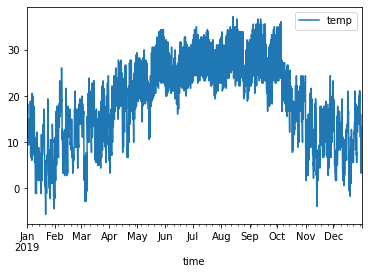

In [362]:
orig[['temp']].plot()

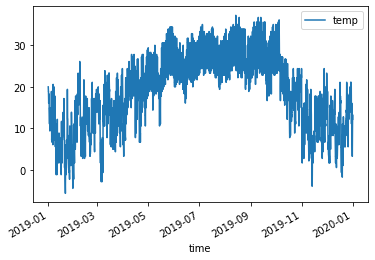

In [363]:
falt[['temp']].plot()

In [364]:
decomposicao=seasonal_decompose(orig[['temp']], model='additive', period=10, extrapolate_trend=30)
decomposicao2=seasonal_decompose(falt[['temp']], model='additive', period=10, extrapolate_trend=30)

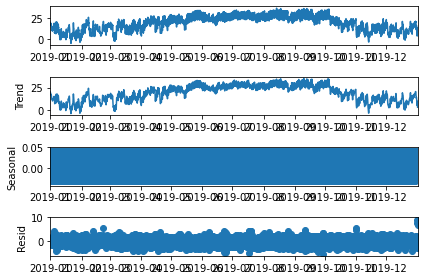

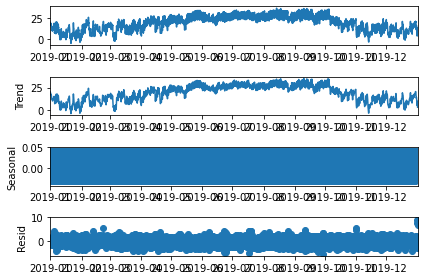

In [365]:
decomposicao.plot()

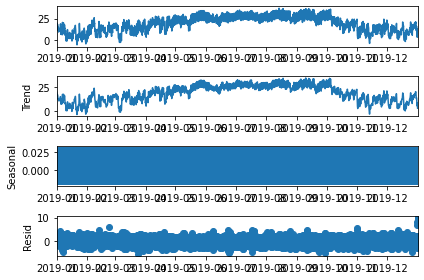

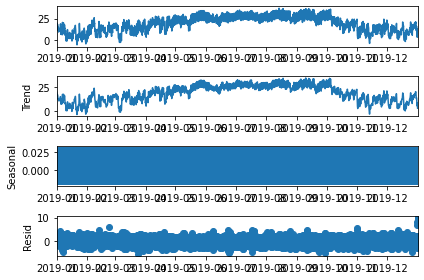

In [366]:
decomposicao2.plot()

--------------------------------------------------------------------------------
#Trabalhar os Dados

In [367]:
def plot_df(orig, falt, temp, titulo=None, xlabel=None, ylabel=None):
    '''	
    df1: dataframe original (sem dados faltantes)
    df2: dataframe com dados faltantes
    col: nome da coluna que contém dados faltantes
    '''    
    df_f = falt.rename(columns={temp: 'faltante'})
    
    colunas = df_f.loc[:, 'faltante':].columns.tolist()
    subplots_t = len(colunas)
   
    fig, ax = plt.subplots(subplots_t+1, 1, sharex=True)
    plt.subplots_adjust(hspace=0.25)
    fig.suptitle = titulo 
    
    orig[temp].plot(ax=ax[0], figsize=(10, 16))
    ax[0].set_title('Dataset Original')
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel(ylabel)    
    
    for i, nomecol in enumerate(colunas):
        df_f[nomecol].plot(ax=ax[i+1])
        ax[i+1].set_title(nomecol)

    plt.show()

In [368]:
def indice_rmse(orig, falt, col=None):
    '''
    df1: dataframe original (sem dados faltantes)
    df2: dataframe com dados faltantes
    col: nome da coluna que contém dados faltantes

    retorna: a lista de índices
    '''
    df_f = falt.rename(columns={col: 'faltante'})
    colunas = df_f.loc[:, 'faltante':].columns.tolist()
    scores = []
    for comp_col in df_f[1:]:
        rmse = np.sqrt(np.mean((orig[col] - df_f[comp_col])**2))
        scores.append(rmse)
        print(f'RMSE de {comp_col}: {rmse}')
    return scores

In [369]:
import pandas as pd
import matplotlib.pyplot as plt

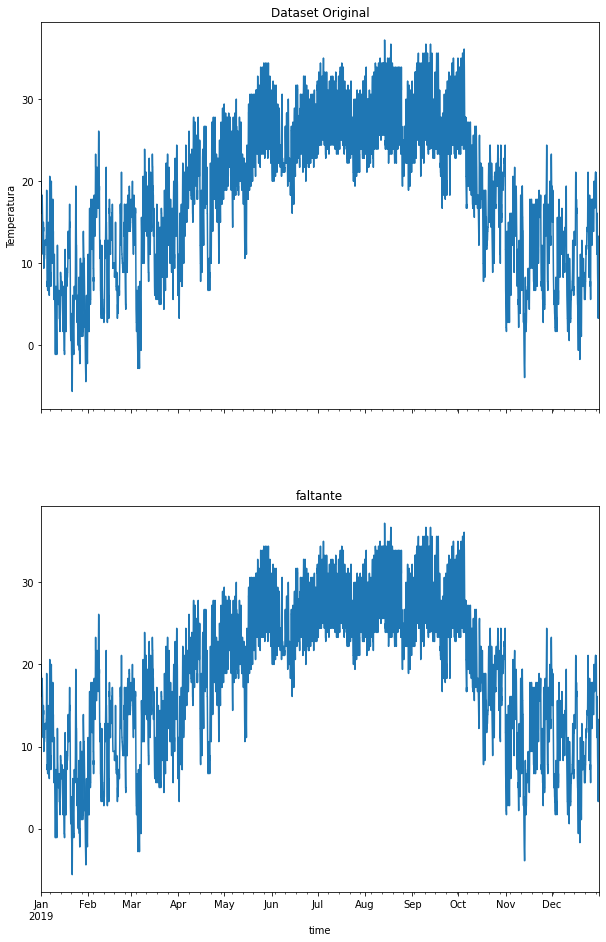

In [370]:
plot_df(orig, 
         falt, 
         'temp',
         titulo="Temperatura",
         xlabel="Meses",
         ylabel="Temperatura")

In [371]:
falt['ffill'] = falt['temp'].fillna(method='ffill')
falt['bfill'] = falt['temp'].fillna(method='bfill')
falt['mean'] = falt['temp'].fillna(falt['temp'].mean())

In [372]:
#Calculando o erro quadrático médio
_ = indice_rmse(orig, 
                    falt, 
                    'temp')

RMSE de faltante: 0.0
RMSE de ffill: 0.0
RMSE de bfill: 0.0
RMSE de mean: 0.0


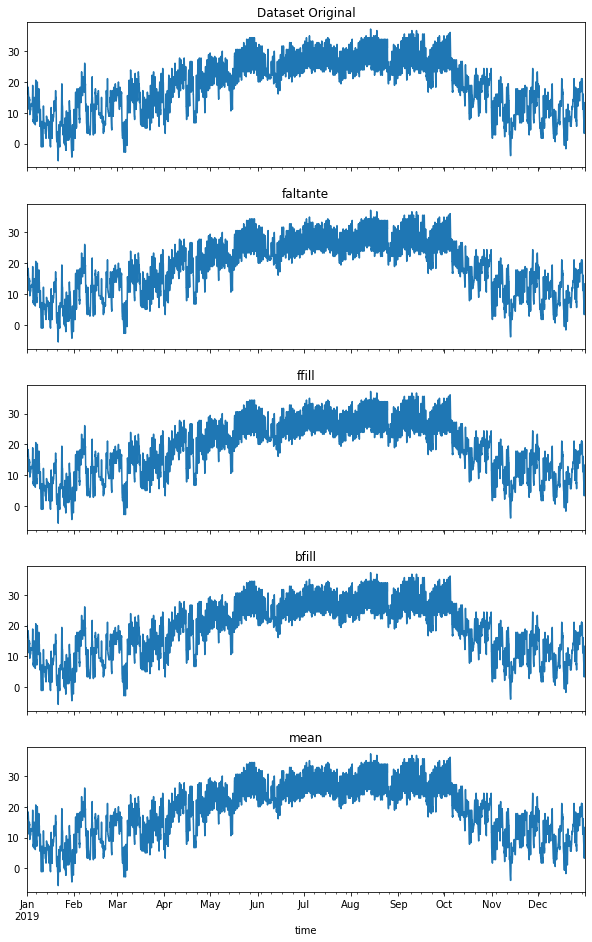

In [373]:
plot_df(orig, falt, 'temp')

In [374]:


##### Verificando os valores e colunas #####

#display(miss) # Exibe o Dataframe

#print(miss.isna().any()) # Exibe como True ou False os valores nan do Dataframe
#print(miss.isna().sum()) # Exibe a soma dos valores nan no Dataframe
#miss.head()
#miss.info(verbose=True)
#print(miss.info())
#miss.shape
#miss.isna().sum()
#miss.isnull().sum()
#type(miss)